## Step 1: Importing Libraries
First, we need to import the necessary libraries for our project. We'll use pandas, matplotlib,numpy and seaborn and load the data 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#load data
df = pd.read_csv("all_data.csv")

## Step 2: Diagnose Data
to understanding the structure of the DataFrame we will check the colums, rows and data types to get a concise summary of our DataFrame. 


In [25]:
#view first 10 columns of df
print(df.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


In [27]:
#view the columns in df
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [28]:
#concise summary of df
df.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [29]:
#descriptive statistics of df
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [30]:
#count of unique values for columns 
print(df.value_counts())

Country                   Year  Life expectancy at birth (years)  GDP         
Chile                     2000  77.3                              7.786093e+10    1
                          2001  77.3                              7.097992e+10    1
United States of America  2006  77.8                              1.390000e+13    1
                          2005  77.5                              1.310000e+13    1
                          2004  77.5                              1.230000e+13    1
                                                                                 ..
China                     2013  75.6                              9.607220e+12    1
                          2012  75.4                              8.560550e+12    1
                          2011  75.2                              7.572550e+12    1
                          2010  75.0                              6.100620e+12    1
Zimbabwe                  2015  60.7                              1.630467e+10   

In [31]:
#data types of each column
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


## Step 3: Check for duplicates and missing values

In [14]:
duplicates = df.duplicated()
print(duplicates.value_counts())

True     95
False     1
Name: count, dtype: int64


In [30]:
missing_values = df.isnull().sum()
print(missing_values)

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


## Step4: Visualize Data

#A scatterplot to observe the general trend across six countries. Each point represents a combination of GDP and life expectancy for a specific year and country.

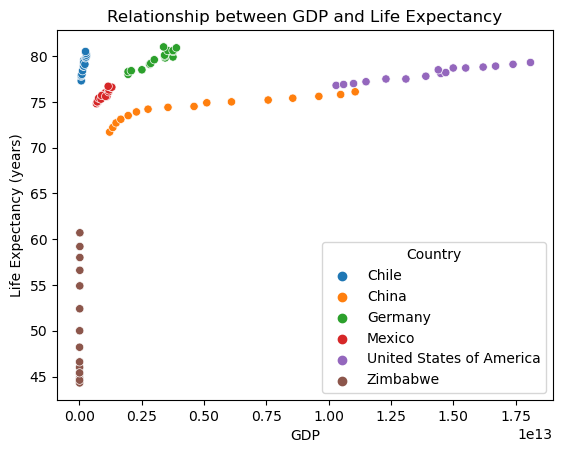

<Figure size 640x480 with 0 Axes>

In [36]:

sns.scatterplot(data=df, x='GDP', y='Life expectancy at birth (years)', hue='Country')
plt.title('Relationship between GDP and Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.show()
plt.clf()


#Create a linear regression model for each country to understand how changes in GDP are associated with changes in life expectancy.
(dependent variable (life expectancy) and  independent variables (GDP and year).

In [15]:

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    X = sm.add_constant(country_data['GDP'])  # Add a constant term to the independent variable
    y = country_data['Life expectancy at birth (years)']
    model = sm.OLS(y, X).fit()
    print(f"Country: {country}")
    print(model.summary())
 


Country: Chile
                                   OLS Regression Results                                   
Dep. Variable:     Life expectancy at birth (years)   R-squared:                       0.902
Model:                                          OLS   Adj. R-squared:                  0.895
Method:                               Least Squares   F-statistic:                     129.2
Date:                              Mon, 27 May 2024   Prob (F-statistic):           1.87e-08
Time:                                      11:08:56   Log-Likelihood:                -4.4985
No. Observations:                                16   AIC:                             13.00
Df Residuals:                                    14   BIC:                             14.54
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t| 

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... co

The regression results suggest a strong positive relationship between GDP and life expectancy in most countries. The model explains a significant portion of the variability in life expectancy, and both the intercept and GDP are statistically significant predictors. However, the high condition number indicates potential multicollinearity issues.

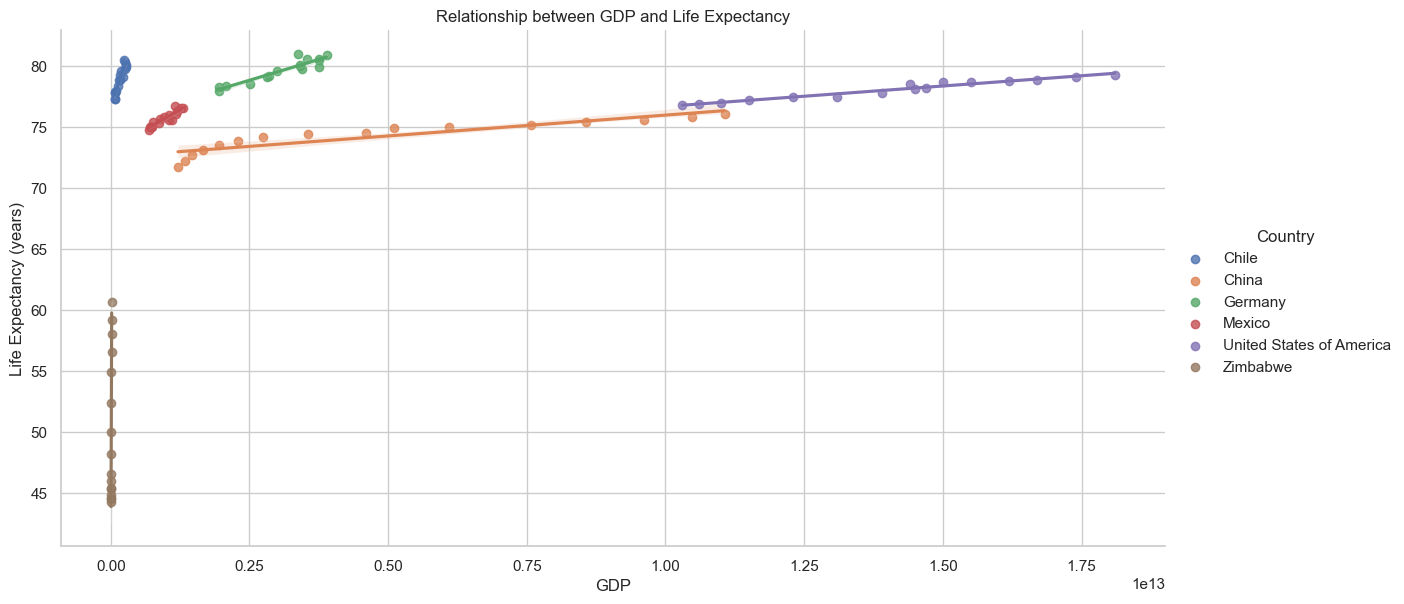

In [23]:

sns.set(style="whitegrid")
r = sns.lmplot(x='GDP', y='Life expectancy at birth (years)', hue='Country', data=df, aspect=2, height=6, markers='o')
r.set_axis_labels("GDP", "Life Expectancy (years)")
plt.title('Relationship between GDP and Life Expectancy')
plt.savefig('gdp_life-expectancy1.png')
plt.show()


In [4]:
import statsmodels.api as sm

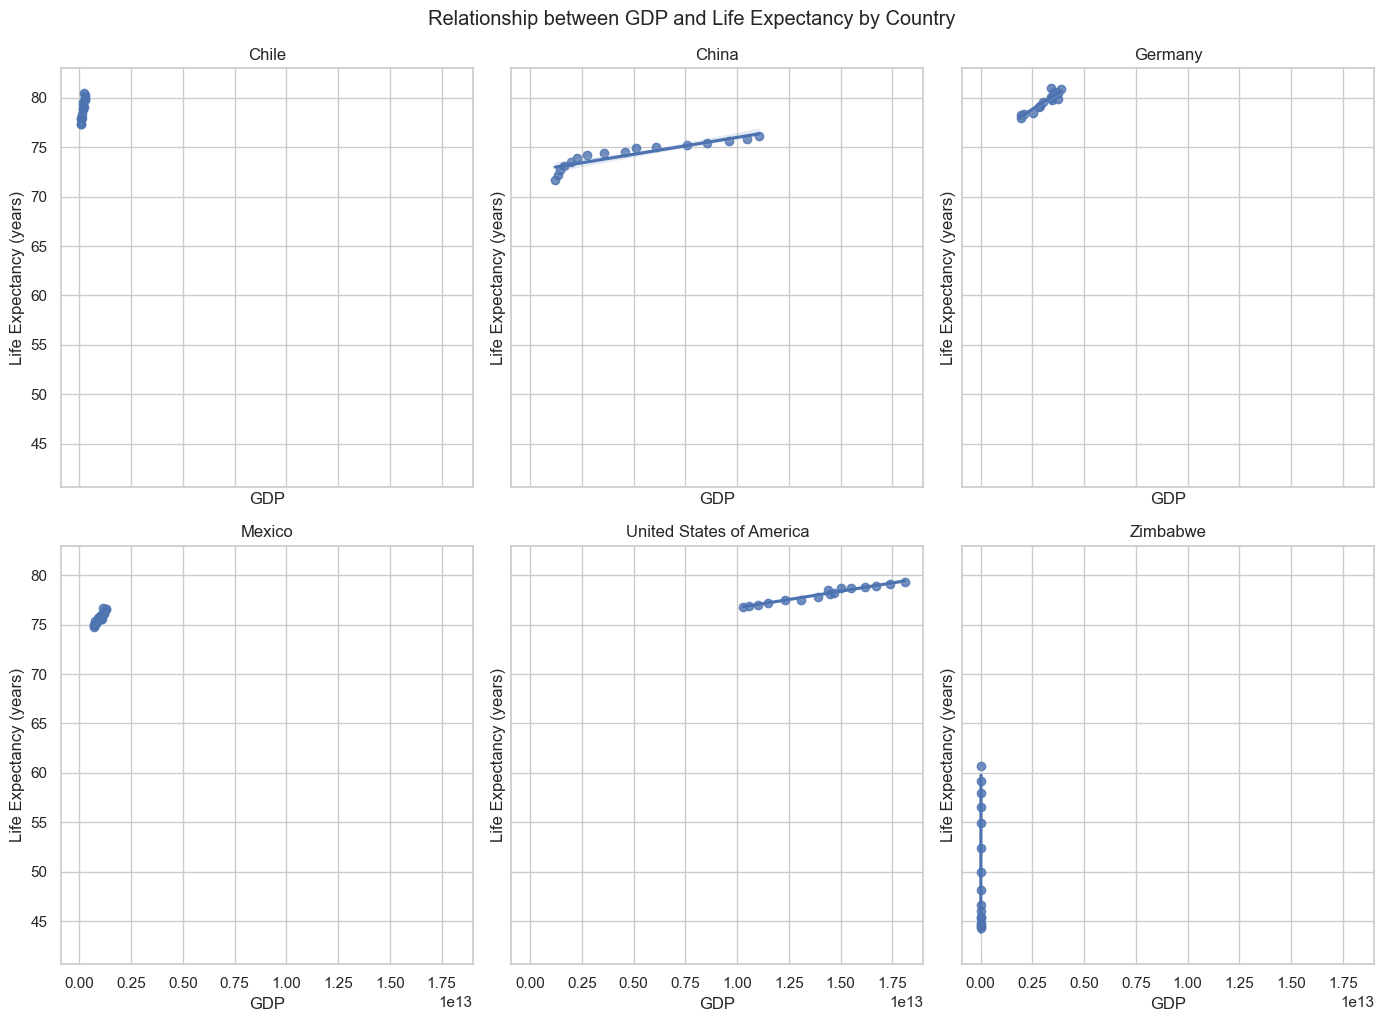

In [21]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each country and create individual scatter plots with regression lines
for ax, country in zip(axes, df['Country'].unique()):
    country_data = df[df['Country'] == country]
    sns.regplot(x='GDP', y='Life expectancy at birth (years)', data=country_data, ax=ax)
    ax.set_title(country)
    ax.set_xlabel('GDP')
    ax.set_ylabel('Life Expectancy (years)')

# Adjust the layout
plt.tight_layout()
plt.suptitle('Relationship between GDP and Life Expectancy by Country', y=1.02)

# Show the plot
plt.show()


#Trends:
-For developed countries (Germany, USA, Chile), life expectancy is high and relatively stable, even with varying GD.

-Developing countries (China, Mexico) show a gradual increase in life expectancy with increasing GDP.

-Zimbabwe is an outlier with significantly lower GDP and life expectancy compared to the other countries.
